In [145]:
# X,Y : 이동평균선 기준. X가 Y를 상승돌파시 매수신호, X가 Y를 하락돌파시 매도신호
# Z : df.index 중 시작일

# Z값 분류
# 0 : 1990-1-3
# 2888 : 2000-1-4
# 3129 : 2001-1-4
# 3619 : 2003-1-2
# 4115 : 2005-1-3
# 4611 : 2007-1-2
# 5105 : 2009-1-2
# 5609 : 2011-1-3
# 6105 : 2013-1-2
# 6352 : 2014-1-2
# 6597 : 2015-1-2
X=1
Y=10
Z=1741

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
# 파일 불러오기
path=r'C:\Users\sw.shin\Desktop\sw.shin\06_코딩\연습용 자료들\03_KOSPI200,F-KOSPI200(2007~).xlsx'
df=pd.read_excel(path, sheet_name='KOSPI 200', index_col=0)
df

,KOSPI 200
D A T E,
2007-01-02,185.70
2007-01-03,182.13
2007-01-04,180.52
2007-01-05,179.10
2007-01-08,177.08
...,...
2019-12-04,274.15
2019-12-05,273.30
2019-12-06,276.56


In [148]:
df.index[Z]

Timestamp('2014-01-02 00:00:00')

In [149]:
df=df[Z:]
df

,KOSPI 200
D A T E,
2014-01-02,257.64
2014-01-03,254.48
2014-01-06,255.41
2014-01-07,255.98
2014-01-08,255.76
...,...
2019-12-04,274.15
2019-12-05,273.30
2019-12-06,276.56


In [150]:
# F-KOSPI 200 붙이기
dg=pd.read_excel(path, sheet_name='F-KOSPI 200', index_col=0)
df['F-KOSPI 200']=dg
df=df[:-2]
df

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,KOSPI 200,F-KOSPI 200
D A T E,,
2014-01-02,257.64,1268.08
2014-01-03,254.48,1252.62
2014-01-06,255.41,1255.57
2014-01-07,255.98,1261.46
2014-01-08,255.76,1260.23
...,...,...
2019-12-02,277.44,1348.90
2019-12-03,276.19,1341.13
2019-12-04,274.15,1334.09


In [151]:
# KOSPI 200의 일간 수익률,MA_X, MA_Y 구하기,
df['KOSPI 200 daily return']=df['KOSPI 200'].pct_change()
df['F-KOSPI 200 daily return']=df['F-KOSPI 200'].pct_change()
df['MA'+str(X)]=df['KOSPI 200'].rolling(window=X).mean()
df['MA'+str(Y)]=df['KOSPI 200'].rolling(window=Y).mean()
df

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

,KOSPI 200,F-KOSPI 200,KOSPI 200 daily return,F-KOSPI 200 daily return,MA1,MA10
D A T E,,,,,,
2014-01-02,257.64,1268.08,NaN,NaN,257.64,NaN
2014-01-03,254.48,1252.62,-0.012265,-0.012192,254.48,NaN
2014-01-06,255.41,1255.57,0.003655,0.002355,255.41,NaN
2014-01-07,255.98,1261.46,0.002232,0.004691,255.98,NaN
2014-01-08,255.76,1260.23,-0.000859,-0.000975,255.76,NaN
...,...,...,...,...,...,...
2019-12-02,277.44,1348.90,0.002385,0.001084,277.44,280.847
2019-12-03,276.19,1341.13,-0.004505,-0.005760,276.19,279.843
2019-12-04,274.15,1334.09,-0.007386,-0.005249,274.15,279.037


In [152]:
# 매수신호, 매도신호 입력
df2=df[Y-1:-1]
df2['매수신호']='No'
df2['매도신호']='No'
df2['보유여부']='No'
for i in range(1,len(df2)):
    if df2.loc[df2.index[i-1],'MA'+str(X)]<df2.loc[df2.index[i-1],'MA'+str(Y)]:
        if df2.loc[df2.index[i],'MA'+str(X)]>df2.loc[df2.index[i],'MA'+str(Y)]: #상방 돌파신호
            df2.loc[df2.index[i], '매수신호']='Yes'

for i in range(1,len(df2)):
    if df2.loc[df2.index[i-1],'MA'+str(X)]>df2.loc[df2.index[i-1],'MA'+str(Y)]:
        if df2.loc[df2.index[i],'MA'+str(X)]<df2.loc[df2.index[i],'MA'+str(Y)]: #하방 돌파신호
            df2.loc[df2.index[i], '매도신호']='Yes'
            
df2

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning

,KOSPI 200,F-KOSPI 200,KOSPI 200 daily return,F-KOSPI 200 daily return,MA1,MA10,매수신호,매도신호,보유여부
D A T E,,,,,,,,,
2014-01-15,254.73,1255.57,0.002992,0.003533,254.73,254.816,No,No,No
2014-01-16,255.36,1258.02,0.002473,0.001951,255.36,254.588,Yes,No,No
2014-01-17,253.46,1246.49,-0.007440,-0.009165,253.46,254.486,No,Yes,No
2014-01-20,254.81,1256.79,0.005326,0.008263,254.81,254.426,Yes,No,No
2014-01-21,256.34,1265.63,0.006004,0.007034,256.34,254.462,No,No,No
...,...,...,...,...,...,...,...,...,...
2019-11-29,276.78,1347.44,-0.015823,-0.015605,276.78,281.821,No,No,No
2019-12-02,277.44,1348.90,0.002385,0.001084,277.44,280.847,No,No,No
2019-12-03,276.19,1341.13,-0.004505,-0.005760,276.19,279.843,No,No,No


In [153]:
# 보유 종목 선별
for i in range(1,(len(df2))):
    if df2.loc[df2.index[i],'매수신호']=='Yes':
        df2.loc[df2.index[i],'보유여부']='KOSPI 200'
    elif df2.loc[df2.index[i],'매도신호']=='Yes':
        df2.loc[df2.index[i],'보유여부']='KOSPI 인버스'
    else:
        if df2.loc[df2.index[i-1],'보유여부']=='KOSPI 200':
            df2.loc[df2.index[i],'보유여부']='KOSPI 200'
        elif df2.loc[df2.index[i-1],'보유여부']=='KOSPI 인버스':
            df2.loc[df2.index[i],'보유여부']='KOSPI 인버스'
df2.head(50)

,KOSPI 200,F-KOSPI 200,KOSPI 200 daily return,F-KOSPI 200 daily return,MA1,MA10,매수신호,매도신호,보유여부
D A T E,,,,,,,,,
2014-01-15,254.73,1255.57,0.002992,0.003533,254.73,254.816,No,No,No
2014-01-16,255.36,1258.02,0.002473,0.001951,255.36,254.588,Yes,No,KOSPI 200
2014-01-17,253.46,1246.49,-0.007440,-0.009165,253.46,254.486,No,Yes,KOSPI 인버스
2014-01-20,254.81,1256.79,0.005326,0.008263,254.81,254.426,Yes,No,KOSPI 200
2014-01-21,256.34,1265.63,0.006004,0.007034,256.34,254.462,No,No,KOSPI 200
2014-01-22,257.08,1264.40,0.002887,-0.000972,257.08,254.594,No,No,KOSPI 200
2014-01-23,253.74,1249.43,-0.012992,-0.011840,253.74,254.605,No,Yes,KOSPI 인버스
2014-01-24,252.89,1243.54,-0.003350,-0.004714,252.89,254.646,No,No,KOSPI 인버스
2014-01-27,248.95,1227.84,-0.015580,-0.012625,248.95,254.133,No,No,KOSPI 인버스


In [154]:
# 최소시작일 구하기
start=[]
for i in range(len(df2)):
    if df2.loc[df2.index[i-1],'매수신호']=='No':
        if df2.loc[df2.index[i],'매수신호']=='Yes':
            start.append(i)
start[0]

1

In [155]:
# 포트폴리오 구성
df2['Portfolio']=0
df2.loc[df2.index[0:start[0]+1], 'Portfolio']=1000000
df2.head(40)

# 포트폴리오 운용
# KOSPI 레버리지 보유중일땐, 다음날부터 수익률에 영향을 받음.
#  보유중일 땐 다음날부터 포트폴리오 그대로.
for i in range(start[0],len(df2)-1):
    if df2.loc[df2.index[i],'보유여부']=='KOSPI 200':
        df2.loc[df2.index[i+1], 'Portfolio']=(1+df2.loc[df2.index[i+1],'KOSPI 200 daily return'])*df2.loc[df2.index[i],'Portfolio']
    elif df2.loc[df2.index[i],'보유여부']=='KOSPI 인버스':
        df2.loc[df2.index[i+1],'Portfolio']=(1-df2.loc[df2.index[i+1], 'F-KOSPI 200 daily return'])*df2.loc[df2.index[i],'Portfolio']

df2[70:100]

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,KOSPI 200,F-KOSPI 200,KOSPI 200 daily return,F-KOSPI 200 daily return,MA1,MA10,매수신호,매도신호,보유여부,Portfolio
D A T E,,,,,,,,,,
2014-04-25,257.42,1257.23,-0.014019,-0.013968,257.42,260.341,No,Yes,KOSPI 인버스,9.779106e+05
2014-04-28,256.80,1257.23,-0.002409,0.000000,256.80,259.970,No,No,KOSPI 인버스,9.779106e+05
2014-04-29,255.80,1252.35,-0.003894,-0.003882,255.80,259.576,No,No,KOSPI 인버스,9.817064e+05
2014-04-30,255.33,1246.49,-0.001837,-0.004679,255.33,259.126,No,No,KOSPI 인버스,9.863000e+05
2014-05-02,255.07,1248.20,-0.001018,0.001372,255.07,258.667,No,No,KOSPI 인버스,9.849469e+05
2014-05-07,252.35,1232.34,-0.010664,-0.012706,252.35,257.750,No,No,KOSPI 인버스,9.974619e+05
2014-05-08,253.84,1240.39,0.005904,0.006532,253.84,257.044,No,No,KOSPI 인버스,9.909462e+05
2014-05-09,254.31,1240.63,0.001852,0.000193,254.31,256.320,No,No,KOSPI 인버스,9.907545e+05
2014-05-12,255.80,1248.20,0.005859,0.006102,255.80,255.780,Yes,No,KOSPI 200,9.847092e+05


C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


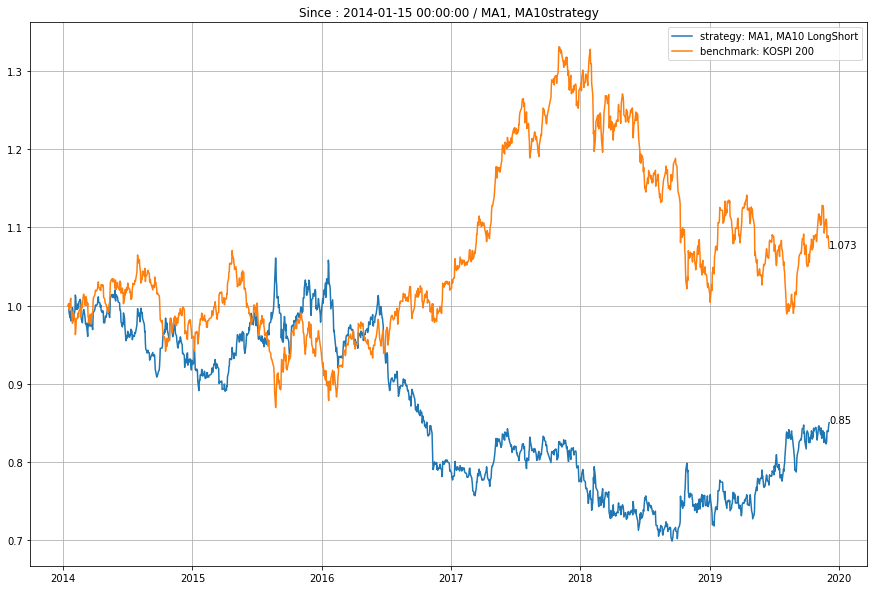

In [156]:
# 그림그리기
df2['benchmark']=df2['KOSPI 200']/df2.loc[df2.index[0],'KOSPI 200']
strategy=df2['Portfolio']/df2.loc[df2.index[0],'Portfolio']
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(strategy, label='strategy: MA'+str(X)+', MA'+str(Y)+' LongShort')
plt.plot(df2['benchmark'], label='benchmark: KOSPI 200')
plt.text(df2.index[-1], strategy[-1], round(strategy[-1],3))
plt.text(df2.index[-1], df2.loc[df2.index[-1],'benchmark'], round(df2.loc[df2.index[-1],'benchmark'],3))
plt.title("Since : "+str(df2.index[0])+" / MA"+str(X)+", MA"+str(Y)+"strategy")
plt.legend()
plt.savefig(str(X)+'_'+str(Y)+'_'+str(Z)+'.png')